## Занятие 8. Нелинейные модели для регрессии. Выбор лучшей модели для регрессии. Построение программного конвеера

Веберите любые данные для задачи регрессии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте нелинейные модели в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 27/12/2021

### Импорты

In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

### Данные

*Источник:* http://archive.ics.uci.edu/ml/datasets/Wine+Quality

*Название:* **Wine Quality Data Set**

#### Описание данных

Включены два набора данных, относящиеся к образцам красного и белого вин с севера Португалии. Но в данной работе будут рассматриваться только данные по белому вину.

### Описание полей

1. **fixed acidity** — фиксированная кислотность;
1. **volatile acidity** — летучая кислотность;
1. **citric acid** — лимонная кислота;
1. **residual sugar** — остаточный сахар;
1. **chlorides** — хлориды;
1. **free sulfur dioxide** — свободный диоксид серы;
1. **total sulfur dioxide** — общий диоксид серы;
1. **density** — густота;
1. **pH** — потенциал водорода;
1. **sulphates** — сульфаты ;
1. **alcohol** — спирт;
1. **quality** — качество (от 0 до 10);

In [2]:
filename = "winequality-white.csv"
dataframe = read_csv(filename, delimiter=";")
array = dataframe.values
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
X = array[:,0:11]
Y = array[:,11]

Регрессия будет оценивать качество белого вина, а факторными признаками будет состав.

### k-Nearest Neighbors

In [5]:
# KNN Regression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.6403892992779934


В методе _k-ближайших соседей_ величина средней квадратической ошибки (MSE) составила **0.6404**, что достаточно хорошо, потому что близко к 0, то есть модель хорошо объясняет данные.

### Classification and Regression Trees

In [6]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.6843524894620424


В методе _классификации и регрессионных деревьев_ величина средней квадратической ошибки (MSE) составила **0.6843**, что немного хуже чем в методе _k-ближайших соседей_. Однако данная модель всё равно хорошо объясняет данные.

### Support Vector Machines

In [7]:
# SVM Regression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVR(gamma='auto')
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.5380639205069041


В методе _опорных векторов_ величина средней квадратической ошибки (MSE) составила **0.538**. Это лучший результат среди всех моделей, следовательно для объясния данных стоит выбрать метод опорных векторов.

По построенным ранее моделям выберите лучший алгоритм машинного обучения для задачи регрессии. Создайте пайплайн (программный конвеер) в соответствии с указанной ниже схемой. Комментарии к каждому разделу обязательны.

### Вывод

Таким образом, лучшим алгоритмом машинного обучения для задачи регрессии является алгоритм опорных векторов.

### Выбор лучшего алгоритма машинного обучения для задачи регрессии

LinRegr: -0.570983 (0.046166)
Ridge: -0.574889 (0.037923)
Lasso: -0.754430 (0.058473)
ElasticNet: -0.747631 (0.057444)
KNN: -0.640389 (0.033778)
DTree: -0.687435 (0.059725)
SVM: -0.662423 (0.049181)


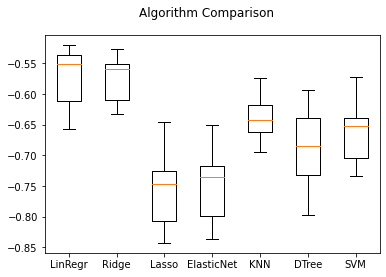

In [8]:
# Compare Algorithms
# prepare models
models = []
models.append(('LinRegr', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Мы сравнивали между собой алгоритмы _линейной регрессии_, _гребневой регрессии_, _лассо регресии_, _эластичной чистой регрессии_, _алгоритм k-ближайших соседей_, _алгоритм деревьев классификации_ и _алгоритм опорных векторов_ (_Support Vector Machine_). Исходя из результатов, полученных на основе средней квадратической ошибке о том, что самые точные значения выводят модели, сформированные алгоритмами: `LinRegr`,`Ridge`, `KNN`, `DTree`, `SVM`.

Ящик с усами – это упрощенная гистограмма. Он огрубляет распределение. Но на нем так же можно увидеть асимметрию распределений. В данном случае все ящики имеют положительную ассиметрию или не имеют ее.

### Программный конвеер подготовки данных и моделирования

In [12]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('DTree', DecisionTreeRegressor()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-0.6835516046909562


Pipeline помогает автоматизировать рабочие процессы машинного обучения. Конвейеры работают, позволяя объединить линейную последовательность преобразований данных, что завершается процессом моделирования, который можно оценить. Данный конвеер поможет нам стандартизировать функцию, а затем масштабировать. В нашем случае оцениваем полученную модель по среднему квадратичному отклонению. Оно у нас получилось равны __0.68__, что говорит о высокой точности получаемых результатов.

### Программный конвеер отбора признаков и моделирования

In [10]:
# create feature union
features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('LinRegr', LinearRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-0.5706995161898507


В данном случае конвеер позволяет уменьшить размерность данных с помощью преобразования на основе линейной алгебры (PCA), удалить все, кроме k  функции с наивысшими оценками (SelectKBest), а затем использовать метод линейной регрессии(LinRegr). Полученный таким образом результат будет иметь среднюю квадратичную ошибку равную __0.57__, что достаточно хорошо.